# MSA 2024 Phase 2 - Part 2

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

## 1. Load and split preprocessed data

In part one we output a dataframe in which the null values of MarkDown was replaced with zeroes. The reason for this was to hopefully not loose information given by other features that could happen if these data points were dropped instead.

In [2]:
# load data frame from part 1 output
path_to_df = '../1. Analysis and Preprocessing/output/data_sales_fill0.csv'
data_sales_df = pd.read_csv(path_to_df, index_col=0)

print(data_sales_df.head()) 

     Store  Dept  Weekly_Sales  IsHoliday  MarkDown1  MarkDown2  MarkDown3  \
0        1     1      24924.50          0        0.0        0.0        0.0   
73       1     1      46039.49          1        0.0        0.0        0.0   
145      1     1      41595.55          0        0.0        0.0        0.0   
218      1     1      19403.54          0        0.0        0.0        0.0   
290      1     1      21827.90          0        0.0        0.0        0.0   

     MarkDown4  MarkDown5  Type    Size  Week  Year  Holiday1  Holiday2  \
0          0.0        0.0     1  151315     5  2010         0         0   
73         0.0        0.0     1  151315     6  2010         1         0   
145        0.0        0.0     1  151315     7  2010         0         0   
218        0.0        0.0     1  151315     8  2010         0         0   
290        0.0        0.0     1  151315     9  2010         0         0   

     Holiday3  Holiday4  
0           0         0  
73          0         0  
14

In [3]:
# Labels are the values we want to predict
data_sales = data_sales_df.copy()
labels = np.array(data_sales["Weekly_Sales"])

data_sales= data_sales.drop("Weekly_Sales", axis = 1)

# Saving feature names for later use
data_sales_list = list(data_sales.columns)


data_sales = np.array(data_sales)

In [4]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(data_sales, labels, test_size = 0.3, random_state = 101)

In [5]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (295099, 16)
Training Labels Shape: (295099,)
Testing Features Shape: (126471, 16)
Testing Labels Shape: (126471,)


## 2. Choose an algorithm

Here we evaluate a number of different models to determine the one with the best baseline that we then tune. Our evaluation of models will look at the root mean squared error, mean squared error and mean absolute error for determining the best model to use.

The models we consider are:

1. Random Forest Regressor
2. Linear Regression
3. K Neighbours Regressor (KNN)
4. Decision Tree Regressor
5. Gradient Boosting Regressor
6. Ridge


In [6]:
# Create a dict of models to evaluate
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

models = {
    'RandomForest': RandomForestRegressor(n_estimators=25, random_state=101),
    'LinearRegression': LinearRegression(),
    'NearestNeighbours': KNeighborsRegressor(n_neighbors=3),
    'DecisionTree': DecisionTreeRegressor(),
    'GradientBoost': GradientBoostingRegressor(**params),
    'Ridge': Ridge(alpha=.5)
}

print(f'Number of models to evaluate: {len(models)}')

Number of models to evaluate: 6


In [7]:
def model_evals(model, train_features, test_features, train_labels, test_labels):

    # Model fit
    model.fit(train_features, train_labels)
    
    # Model predict
    predictions = model.predict(test_features)

    # Calculate root mean square error (RMSE)
    rmse = np.sqrt(np.mean((test_labels- predictions)**2))
    # Calculate the mean absolute errors
    mae =  mean_absolute_error(test_labels, predictions)
    # Calculate mean squared error (MSE)
    mse = mean_squared_error(test_labels, predictions)

    # Calculate r2 score
    r2=r2_score(test_labels, predictions)
        
    return rmse, mae, mse, r2

# rms, accuracy, mse, mae, mape = model_evals(model, len(models), train_features, test_features, train_labels, test_labels)
# print(f'{name}  Test RMSE {rms} Test Accurracy {accuracy} Test MSE {mse} Test MAE {mae}  Test MAPE {mape}')
for name, model in models.items():
    rmse, mae, mse, r2 = model_evals(model, train_features, test_features, train_labels, test_labels)
    print(f'{name}:\n  Test RMSE: {rmse} \n  Test MSE: {mse} \n  Test MAE: {mae} \n  Test R2-SCORE: {r2}')


RandomForest:
  Test RMSE: 3894.001902365806 
  Test MSE: 15163250.815628516 
  Test MAE: 1430.8814353772802 
  Test R2-SCORE: 0.9703867290471812
LinearRegression:
  Test RMSE: 21621.749267777726 
  Test MSE: 467500041.39864665 
  Test MAE: 14560.355933877972 
  Test R2-SCORE: 0.0869896195264962
NearestNeighbours:
  Test RMSE: 15755.382787857307 
  Test MSE: 248232086.79191026 
  Test MAE: 8596.545104042298 
  Test R2-SCORE: 0.5152118675122113
DecisionTree:
  Test RMSE: 5153.027118518181 
  Test MSE: 26553688.484183785 
  Test MAE: 1800.0034513841117 
  Test R2-SCORE: 0.9481416233603146
GradientBoost:
  Test RMSE: 17098.780758492147 
  Test MSE: 292368303.4269813 
  Test MAE: 11053.893214280535 
  Test R2-SCORE: 0.4290154602946016
Ridge:
  Test RMSE: 21621.74948447597 
  Test MSE: 467500050.76943696 
  Test MAE: 14560.355128325229 
  Test R2-SCORE: 0.08698960122568755


From our metrics we see RandomForestRegressor and DecisionTreeRegressor have a better baseline performance both having a high r2-score. RandomForestRegressor has lower errors compared to DecisionTreeRegressor, so we will continue with RandomForestRegressor for tuning.

## 3. Train and test a model

### Model Tuning
Using the RandomForestRegressor we next look for the parameters that give the best performance. To do so we select a few different input values for n_estimators, max_depth, min_samples_split, min_samples_leaf and implement a loop evaluating the r2-score and root mean square error for a trained model with each parameter value. 

In [8]:
import scipy.stats as stats
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, RandomizedSearchCV

In [ ]:
def random_forest_tuning(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    result = []
    for estimator in n_estimators:
        for depth in max_depth:
            for split in min_samples_split:
                for leaf in min_samples_leaf:
                    print('n_estimators:', estimator, ', max_depth:', depth, ', min_samples_split:', split, ', min_samples_leaf:', leaf)
                    RF_tune = RandomForestRegressor(n_estimators=estimator, max_depth=depth, 
                                            min_samples_leaf=leaf, min_samples_split=split)
                    RF_tune.fit(train_features, train_labels)
                    test_predicted = RF_tune.predict(test_features)
                    rmse = np.sqrt(np.mean((test_labels- test_predicted)**2))
                    r2= r2_score(test_labels, test_predicted)
                    print('RMSE:', rmse, ', R2-score: ', r2)
                    result.append({'n_estimators': estimator, 'Max_Depth': depth, 'Min_Samples_Leaf': leaf, 'Min_Samples_Split': split, 'RMSE': rmse, 'R2-score': r2})
    return pd.DataFrame(result)

In [137]:
max_depth = [15, 20, 25]
min_samples_split =[5, 10, 15]
n_estimators = [50, 55, 60, 65]
min_samples_leaf = [1, 2, 3]

result = random_forest_tuning(n_estimators, max_depth, min_samples_split, min_samples_leaf)

n_estimators: 50 , max_depth: 15 , min_samples_split: 5 , min_samples_leaf: 1
RMSE: 4530.4665668024245 , R2-score:  0.9599151815234781
n_estimators: 50 , max_depth: 15 , min_samples_split: 5 , min_samples_leaf: 2
RMSE: 4539.210611321141 , R2-score:  0.9597603004853478
n_estimators: 50 , max_depth: 15 , min_samples_split: 5 , min_samples_leaf: 3
RMSE: 4497.7347663886 , R2-score:  0.9604923002829403
n_estimators: 50 , max_depth: 15 , min_samples_split: 10 , min_samples_leaf: 1
RMSE: 4490.288627188081 , R2-score:  0.9606230044417854
n_estimators: 50 , max_depth: 15 , min_samples_split: 10 , min_samples_leaf: 2
RMSE: 4488.714321294662 , R2-score:  0.9606506109384477
n_estimators: 50 , max_depth: 15 , min_samples_split: 10 , min_samples_leaf: 3
RMSE: 4508.681114174148 , R2-score:  0.960299762795076
n_estimators: 50 , max_depth: 15 , min_samples_split: 15 , min_samples_leaf: 1
RMSE: 4529.8514799721315 , R2-score:  0.9599260651575884
n_estimators: 50 , max_depth: 15 , min_samples_split: 15 , 

,n_estimators,Max_Depth,Min_Samples_Leaf,Min_Samples_Split,RMSE,R2-score
0,50,15,1,5,4530.466567,0.959915
1,50,15,2,5,4539.210611,0.959760
2,50,15,3,5,4497.734766,0.960492
3,50,15,1,10,4490.288627,0.960623
4,50,15,2,10,4488.714321,0.960651
...,...,...,...,...,...,...
103,65,25,2,10,3792.954250,0.971904
104,65,25,3,10,3824.022204,0.971442
105,65,25,1,15,3858.507086,0.970924
106,65,25,2,15,3855.320846,0.970972


At the time of running the best model parameters with the lowest root mean square error (RMSE) and highest r2-score from the output above is

n_estimators: 55 , max_depth: 25 , min_samples_split: 5 , min_samples_leaf: 1\
RMSE: 3752.404720674648 , R2-score:  0.9725012211151222

This is a brute force approach that does not search all possible parameters and could possibly be improved with further investigation. However, we have a good result from our metrics and continue with the above parameters for predictions.


In [138]:
# IGNORE: running this code took longer than above
#  param_grid = {'max_depth': [15, 20, 25],
#               'min_samples_split': [5, 10, 15], 
#               'n_estimators': [50, 55, 60, 65],
#               'min_samples_leaf': [1, 2, 3]
#               }

# base_estimator = RandomForestRegressor(random_state=0)
# sh = HalvingGridSearchCV(base_estimator, param_grid).fit(train_features, train_labels)
# sh.best_estimator_

## 4. Evaluate the model 

In [9]:
RF = RandomForestRegressor(n_estimators=55, max_depth=25, min_samples_split=5, min_samples_leaf=1)
RF.fit(train_features, train_labels)

RandomForestRegressor(max_depth=25, min_samples_split=5, n_estimators=55)

In [11]:
test_predictions = RF.predict(test_features)



In [12]:
rmse = np.sqrt(np.mean((test_labels- test_predictions)**2))
r2= r2_score(test_labels, test_predictions)

print(f'Final model metrics - RMSE: {rmse}, r2-score: {r2}')

Final model metrics - RMSE: 3756.844616581841, r2-score: 0.9724361087644029


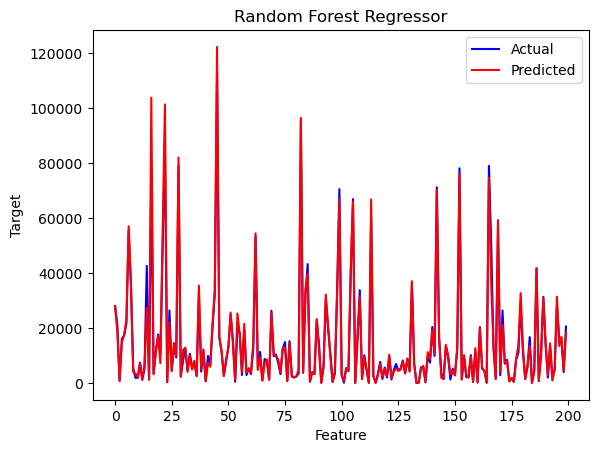

In [13]:
plot_range = range(800,1000)
plt.plot(test_labels[plot_range], color='blue', label='Actual')
plt.plot(test_predictions[plot_range], color='red', label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


Our predictions follow close to the actual labels, suggesting our model performs well.

## 5. Future Predictions

We first create a dataframe to feed into our trained model. This will use the input data frame to keep the Store, Dept, Week and Type information that we assume remains the same as previous years. 

Further, we fill the MarkDown and remaining fields with a mean from across our years. Finally we drop the Weekly_Sales column. Note: Holiday fields will not change either as this is the same over each year.

In [27]:
#copy sales dataframe
predict_df=data_sales_df.copy()

# group new dataframe accross store dept week and type
predict_df=predict_df.groupby(["Store","Dept","Week","Type"])[["Weekly_Sales","IsHoliday", "MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Holiday1","Holiday2","Holiday3","Holiday4", "Year", "Size"]].mean().reset_index(["Store","Dept","Week","Type"])
predict_df=predict_df.drop(columns=["Weekly_Sales"])
display(predict_df.shape)
display(predict_df.head(10))


(159167, 16)

,Store,Dept,Week,Type,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Holiday1,Holiday2,Holiday3,Holiday4,Year,Size
0,1,1,1,1,0.0,3138.695000,10906.580000,71.550000,725.065000,4241.500000,0.0,0.0,0.0,0.0,2011.5,151315.0
1,1,1,2,1,0.0,2591.645000,4012.935000,21.120000,226.540000,1859.690000,0.0,0.0,0.0,0.0,2011.5,151315.0
2,1,1,3,1,0.0,2069.935000,1403.595000,16.940000,250.310000,1700.105000,0.0,0.0,0.0,0.0,2011.5,151315.0
3,1,1,4,1,0.0,582.230000,541.370000,22.000000,5.500000,611.095000,0.0,0.0,0.0,0.0,2011.5,151315.0
4,1,1,5,1,0.0,11525.686667,1193.070000,53.510000,10801.290000,1876.800000,0.0,0.0,0.0,0.0,2011.0,151315.0
5,1,1,6,1,1.0,4641.686667,2309.076667,33.880000,2823.960000,2295.346667,1.0,0.0,0.0,0.0,2011.0,151315.0
6,1,1,7,1,0.0,3291.110000,3687.423333,3.266667,2803.103333,1134.220000,0.0,0.0,0.0,0.0,2011.0,151315.0
7,1,1,8,1,0.0,3116.536667,2518.670000,1.066667,406.640000,2714.530000,0.0,0.0,0.0,0.0,2011.0,151315.0
8,1,1,9,1,0.0,5147.133333,523.000000,3.600000,8463.626667,2689.203333,0.0,0.0,0.0,0.0,2011.0,151315.0
9,1,1,10,1,0.0,3443.680000,50.626667,2.000000,223.810000,1836.613333,0.0,0.0,0.0,0.0,2011.0,151315.0


In [28]:
print(data_sales_list)

['Store', 'Dept', 'IsHoliday', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Type', 'Size', 'Week', 'Year', 'Holiday1', 'Holiday2', 'Holiday3', 'Holiday4']


Next we replace the year column to future years following the end of our dataframe. The actual data ends at week 43 2012, so we replace weeks 44 to 52 with 2012 and 1 to 43 with 2013 to obtain a years worth of future predictions.

In [32]:
predict_df.loc[predict_df["Week"].isin(range(44)), "Year"] = 2013
predict_df.loc[predict_df["Week"].isin(range(44,53)), "Year"] = 2012
display(predict_df.shape)
display(predict_df[["Week","Year"]].tail(10))
display(predict_df[data_sales_list])

(159167, 16)

,Week,Year
159157,43,2013.0
159158,44,2012.0
159159,45,2012.0
159160,46,2012.0
159161,47,2012.0
159162,48,2012.0
159163,49,2012.0
159164,50,2012.0
159165,51,2012.0
159166,52,2012.0


,Store,Dept,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,Week,Year,Holiday1,Holiday2,Holiday3,Holiday4
0,1,1,0.0,3138.695000,10906.580,71.550,725.065,4241.500,1,151315.0,1,2013.0,0.0,0.0,0.0,0.0
1,1,1,0.0,2591.645000,4012.935,21.120,226.540,1859.690,1,151315.0,2,2013.0,0.0,0.0,0.0,0.0
2,1,1,0.0,2069.935000,1403.595,16.940,250.310,1700.105,1,151315.0,3,2013.0,0.0,0.0,0.0,0.0
3,1,1,0.0,582.230000,541.370,22.000,5.500,611.095,1,151315.0,4,2013.0,0.0,0.0,0.0,0.0
4,1,1,0.0,11525.686667,1193.070,53.510,10801.290,1876.800,1,151315.0,5,2013.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159162,45,98,0.0,3417.805000,60.380,401.395,1245.075,8930.750,2,118221.0,48,2012.0,0.0,0.0,0.0,0.0
159163,45,98,0.0,3088.345000,1.435,189.785,796.720,5085.250,2,118221.0,49,2012.0,0.0,0.0,0.0,0.0
159164,45,98,0.0,2315.630000,4.460,400.670,424.165,1378.910,2,118221.0,50,2012.0,0.0,0.0,0.0,0.0
159165,45,98,0.0,398.550000,44.570,981.095,8.500,1492.755,2,118221.0,51,2012.0,0.0,0.0,0.0,0.0


In [33]:
predict_input = np.array(predict_df[data_sales_list])
predict_rf = RF.predict(predict_input)

In [35]:
predict_df["Weekly_Sales"]=predict_rf
display(predict_df.head())


,Store,Dept,Week,Type,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Holiday1,Holiday2,Holiday3,Holiday4,Year,Size,Weekly_Sales
0,1,1,1,1,0.0,3138.695000,10906.580,71.55,725.065,4241.500,0.0,0.0,0.0,0.0,2013.0,151315.0,17736.166370
1,1,1,2,1,0.0,2591.645000,4012.935,21.12,226.540,1859.690,0.0,0.0,0.0,0.0,2013.0,151315.0,17653.712386
2,1,1,3,1,0.0,2069.935000,1403.595,16.94,250.310,1700.105,0.0,0.0,0.0,0.0,2013.0,151315.0,17871.564607
3,1,1,4,1,0.0,582.230000,541.370,22.00,5.500,611.095,0.0,0.0,0.0,0.0,2013.0,151315.0,18062.553283
4,1,1,5,1,0.0,11525.686667,1193.070,53.51,10801.290,1876.800,0.0,0.0,0.0,0.0,2013.0,151315.0,24018.494112


,Week,Year,Weekly_Sales
0,1,2013.0,14275.501517
1,2,2013.0,13865.037114
2,3,2013.0,13818.684116
3,4,2013.0,13843.565057
4,5,2013.0,15093.155372


,Week,Year,Weekly_Sales
0,1,2013,14275.501517
1,2,2013,13865.037114
2,3,2013,13818.684116
3,4,2013,13843.565057
4,5,2013,15093.155372


   Week  Year  Weekly_Sales  Year_Week
0     1  2013  14275.501517 2013-01-11
1     2  2013  13865.037114 2013-01-18
2     3  2013  13818.684116 2013-01-25
3     4  2013  13843.565057 2013-02-01
4     5  2013  15093.155372 2013-02-08


<Axes: title={'center': 'Future predictions'}, xlabel='Date', ylabel='Weekly Sales'>

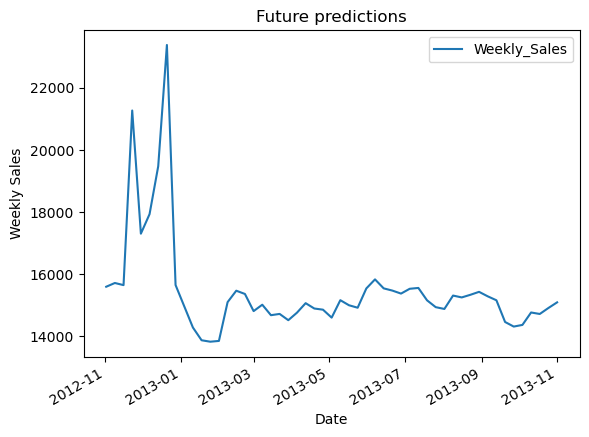

In [38]:
sales_future = predict_df.groupby(["Week","Year"])["Weekly_Sales"].mean().reset_index()
display(sales_future.head())

sales_future["Year"]=sales_future["Year"].astype(int)
display(sales_future.head())

sales_future["Year_Week"] = pd.to_datetime(sales_future["Year"].astype(str) + ' ' + sales_future['Week'].astype(str) + ' 5',
                                format='%Y %U %w')
print(sales_future.head())

sales_future.plot.line(x='Year_Week', y='Weekly_Sales', title='Future predictions', xlabel='Date', ylabel='Weekly Sales')


Text(0, 0.5, 'Sales')

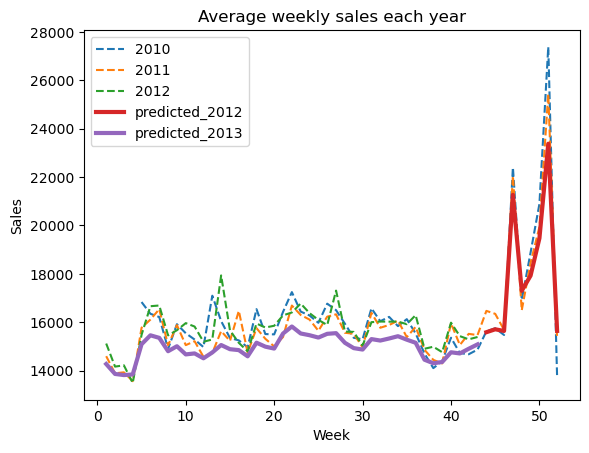

In [42]:
sales_2010 = data_sales_df[data_sales_df["Year"]==2010].groupby(["Week"])["Weekly_Sales"].mean()
sales_2011 = data_sales_df[data_sales_df["Year"]==2011].groupby(["Week"])["Weekly_Sales"].mean()
sales_2012 = data_sales_df[data_sales_df["Year"]==2012].groupby(["Week"])["Weekly_Sales"].mean()

predicted_sales_2012 = sales_future[sales_future["Year"]==2012].groupby(["Week"])["Weekly_Sales"].mean()
predicted_sales_2013 = sales_future[sales_future["Year"]==2013].groupby(["Week"])["Weekly_Sales"].mean()


plt.plot(sales_2010, linestyle='--')
plt.plot(sales_2011, linestyle='--')
plt.plot(sales_2012, linestyle='--')
plt.plot(predicted_sales_2012, linewidth = 3)
plt.plot(predicted_sales_2013, linewidth = 3)
plt.legend(['2010','2011','2012','predicted_2012','predicted_2013'], loc='upper left')
plt.title('Average weekly sales each year')
plt.xlabel('Week')
plt.ylabel('Sales')

Our model predicts future sales with a similar series as past data. It also accounts for sales growth around the holiday periods Holiday3/Holiday4. Our forecasting predictions show an expected average weekly sales per week to be on par with previous years at the end of 2012 and slightly less than previous years in 2013.

## 6. Summary

In this notebook we used the dataframe that replaced the null values with zeroes. Our trained model produced good results predicting


In part one we processed our dataframe and output three different dataframes that each dealt with the missing MarkDown values differently. One dataframe replaced the null values in MarkDown with weekly averages over the various stores and departments. This was done to see if MarkDown would have more of an impact on weekly sales if we had data for those weeks. Our trained model gives predictions for 2013 that are below previous years, using this second dataframe could improve this result as more reasonable average for the MarkDown fields would have been feed into the predictions dataframe, i.e. the zeroes in the dataframe used here would lower the averaged markdown values used.